# Survival analysis for breast cancer patients

Dataset references:
- Beyerle, R.L.A. Neumann and H.F. Rauschecker for the German Breast Cancer Study Group (1994). Randomized 2x 2 trial evaluating hormonal treatment and the duration of chemotherapy in nodepositive breast cancer patients. Journal of Clinical Oncology, 12, 2086-2093. 
- W. Sauerbrei and P. Royston (1999). Building multivariable prognostic and diagnostic models: transformation of the predictors by using fractional polynomials. Journal of the Royal Statistics Society Series A, Volume 162(1), 71-94.

Dataset documentation: [Link](https://rdrr.io/cran/CoxRidge/man/GBSG.html)

## Imports and configuration

In [5]:
import lifelines
import matplotlib.pyplot as plt

from lifelines import KaplanMeierFitter as KM
from lifelines import NelsonAalenFitter as NA
from lifelines.statistics import logrank_test
from lifelines.datasets import load_gbsg2

In [6]:
!ln -s ./../data

ln: ./data: File exists


## Load data

In [7]:
data = load_gbsg2()

In [8]:
print(data.shape)
data.head()

(686, 10)


,horTh,age,menostat,tsize,tgrade,pnodes,progrec,estrec,time,cens
0,no,70,Post,21,II,3,48,66,1814,1
1,yes,56,Post,12,II,7,61,77,2018,1
2,yes,58,Post,35,II,9,52,271,712,1
3,yes,59,Post,17,II,4,60,29,1807,1
4,no,73,Post,35,II,1,26,65,772,1


In [9]:
# save data as CSV file
data.to_csv("data/gbsg.csv", index_label="id")

## Explorative data analysis

### Percentage of censored observations

In [10]:
sum(data['cens'] == 0) / len(data)

0.5641399416909622

### Survival times

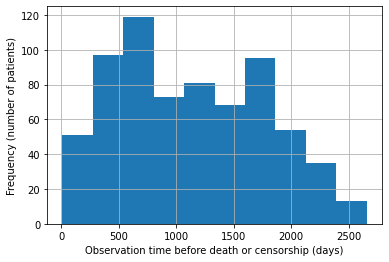

In [11]:
data.time.hist();
plt.xlabel("Observation time before death or censorship (days)");
plt.ylabel("Frequency (number of patients)");

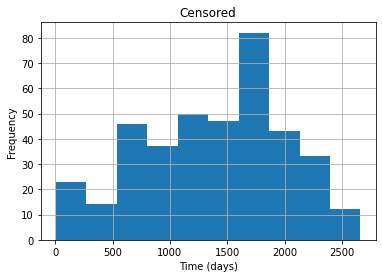

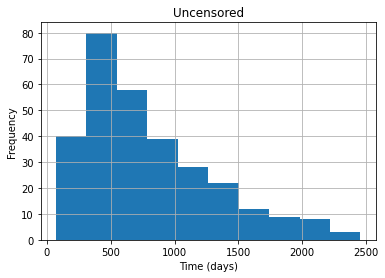

In [12]:
data_cens = data[data['cens'] == 0]
data_uncens = data[data['cens'] == 1]

data_cens.time.hist()
plt.title("Censored")
plt.xlabel("Time (days)")
plt.ylabel("Frequency")
plt.show()

data_uncens.time.hist()
plt.title("Uncensored")
plt.xlabel("Time (days)")
plt.ylabel("Frequency")
plt.show()

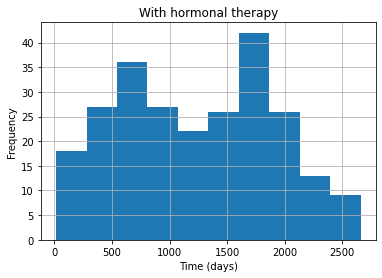

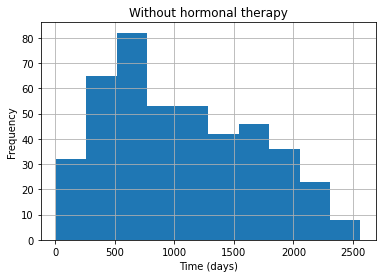

In [13]:
data_ther = data[data['horTh'] == 'yes']
data_nother = data[data['horTh'] == 'no']

data_ther.time.hist()
plt.title("With hormonal therapy")
plt.xlabel("Time (days)")
plt.ylabel("Frequency")
plt.show()

data_nother.time.hist()
plt.title("Without hormonal therapy")
plt.xlabel("Time (days)")
plt.ylabel("Frequency")
plt.show()

## Survival function: Kaplan-Meier estimate

### Global estimate

In [14]:
T = data["time"]
E = data["cens"]

kmf = KM()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 686 total observations, 387 right-censored observations>

Median survival time:  1807.0


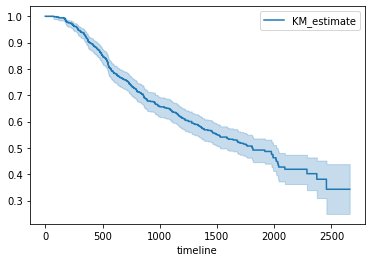

In [15]:
print("Median survival time: ", kmf.median_survival_time_)
kmf.plot();

### Subgroup analysis

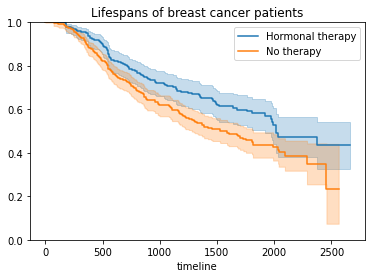

In [16]:
ax = plt.subplot(111)

ther = (data["horTh"] == "yes")

kmf.fit(T[ther], event_observed=E[ther], label="Hormonal therapy")
kmf.plot(ax=ax)

kmf.fit(T[~ther], event_observed=E[~ther], label="No therapy")
kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.title("Lifespans of breast cancer patients");

### Logrank test

In [17]:
results = logrank_test(T[ther], T[~ther], E[ther], E[~ther])
results.print_summary()

## Cumulative hazard function: Nelson-Aalen estimator

### Global estimate

In [18]:
naf = NA()
naf.fit(T, event_observed=E)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 686 total observations, 387 right-censored observations>

          NA_estimate
timeline             
0.0               0.0
8.0               0.0
15.0              0.0
16.0              0.0
17.0              0.0


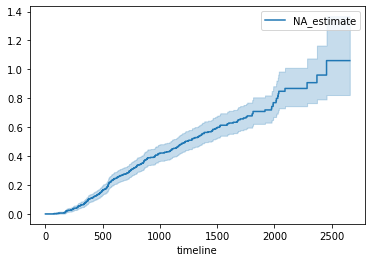

In [19]:
print(naf.cumulative_hazard_.head())
naf.plot()

### Subgroup analysis

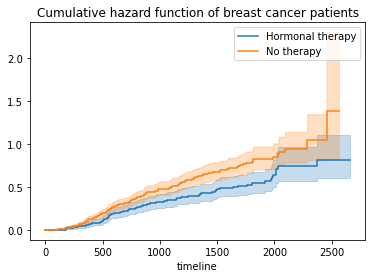

In [20]:
ax = plt.subplot(111)

naf.fit(T[ther], event_observed=E[ther], label="Hormonal therapy")
naf.plot(ax=ax)

naf.fit(T[~ther], event_observed=E[~ther], label="No therapy")
naf.plot(ax=ax)

plt.title("Cumulative hazard function of breast cancer patients");